<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
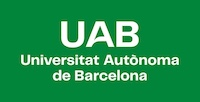
</div>
</div>
<div style="float: right; width: 50%;">
    <p style="margin: 0; padding-top: 22px; text-align:right;"><b>104338 - Programació Avançada</b></p>
    <p style="margin: 0; text-align:right;">Grau en Enginyeria de Dades</p>
    <p style="margin: 0; text-align:right;">Universitat Autònoma de Barcelona (UAB)</p>
</div>
<div style="width: 100%; clear: both;"></div>
<div style="width:100%;">&nbsp;</div>

# Polimorfisme

El polimorfisme ens permet:

- Capacitat d’accedir a objectes de diferents classes utilitzant la mateixa interfície pública.
- Cada classe implementa la seva pròpia versió del mètode, però totes les classes comparteixen la declaració (número i tipus dels paràmetres i valor de retorn).

In [1]:
from typing import List
from datetime import date, datetime


class Moviment:
    _descripcio: str
    _valor: float
    _data: date

    def __init__(self, descripcio: str="", valor: float=0.0, data: str='') -> None:
        self._descripcio = descripcio
        self._valor = valor
        if data == '':
            self._data = date.today()
        else:
            self._data = datetime.strptime(data, '%d/%m/%Y')
        
    @property
    def descripcio(self) -> str:
        return self._descripcio
    
    @descripcio.setter
    def descripcio(self, valor: str) -> None:
        self._descripcio = valor
        
    @property
    def valor(self) -> float:
        return self._valor
    
    @valor.setter
    def valor(self, valor: float) -> None:
        self._valor = valor
        
    @property
    def data(self) -> str:
        return datetime.strftime(self._data, '%d/%m/%Y')
    
    @data.setter
    def data(self, valor: str) -> None:
        self._data = datetime.strptime(valor, '%d/%m/%Y')

In [3]:
class CompteCorrent:
    _titular: str
    _saldo: float = 0.0
    _moviments: List[Moviment]
    
    def __init__(self, titular: str='', saldo: float=0.0) -> None:
        self._titular = titular
        self._saldo = saldo
        self._moviments = []
    
    @property
    def titular(self) -> str:
        return self._titular
    
    @property
    def saldo(self) -> float:
        return self._saldo
    
    def afegeix_moviment(self, descripcio: str, valor: float, data: str) -> None:
        moviment = Moviment(descripcio, valor, data)
        self._moviments.append(moviment)
        self._saldo += valor

In [6]:
class CompteJove(CompteCorrent):
    _punts: int
    
    def __init__(self, titular: str='', saldo: float=0.0, punts: int=0) -> None:
        super().__init__(titular, saldo)
        self._punts = punts
    
    @property
    def punts(self) -> int:
        return self._punts
       
    def afegeix_moviment(self, descripcio: str, valor: float, data: str) -> None:
        super().afegeix_moviment(descripcio, valor, data)
        if valor > 0:
            self._punts += int(valor/100)

En temps d’execució, dinàmicament es determina de **quina classe és l’objecte** i es crida al mètode corresponent a la classe de l’objecte.

In [7]:
c = CompteCorrent('ernest')
c.afegeix_moviment('desc_1', 100, '01/01/2022')
print(c.saldo)

cj = CompteJove('ernest')
cj.afegeix_moviment('desc_1', 100, '01/01/2022')
print(cj.saldo, cj.punts)

100.0
100.0 1


El polimorfisme permet utilitzar objectes de les classes derivades a qualsevol lloc on es pot utilitzar un objecte de la classe base. 

Es poden activar els mètodes de la classe base amb objectes de les classes derivades sense necessitar saber explícitament quina subclasse és.

A l'exemple següent:
- `llista_comptes` és una única llista per guardar conjuntament objectes de tipus `CompteCorrent` i `CompteJove`.
- L’objecte `c` pot ser de la classe `CompteCorrent` o `CompteJove`.
- Utilitzant `c`, podem cridar a qualsevol mètode heretat de la classe base (`afegeix_moviment`) i es cridarà automàticament a la versió del mètode que correspongui al tipus de l’objecte: `CompteCorrent` o `CompteJove`.

In [8]:
llista_comptes = []
llista_comptes.append(CompteCorrent('ernest'))
llista_comptes.append(CompteJove('ernest'))

for c in llista_comptes:
    c.afegeix_moviment('desc1', 100, '01/01/2022')
    print(c.saldo)

100.0
100.0


De vegades podem necessitar comprovar el tipus d’un objecte per poder fer les accions definides només a les classes derivades.

En aquests casos, i només quan sigui imprescindible, podem fer ús de:

- `isinstance(objecte, nom_classe)`: retorna `True` si l’objecte pertany a la classe indicada (o a alguna de les seves subclasses).

In [9]:
for c in llista_comptes:
    print("Titular: ", c.titular)
    print("Saldo: ", c.saldo)
    
    if (isinstance(c, CompteJove)):
        print("Punts: ", c.punts)

Titular:  ernest
Saldo:  100.0
Titular:  ernest
Saldo:  100.0
Punts:  1


Com a norma general, hauríem de **reduir al mínim la comprovació del tipus dels objectes**, i substituir-ho sempre que puguem per crides a mètodes de les classes utilitzant polimorfisme, com podem veure a l'exemple següent:

In [10]:
class CompteCorrent:
    _titular: str
    _saldo: float
    _moviments: List[Moviment]
    
    def __init__(self, titular: str='', saldo: float=0.0) -> None:
        self._titular = titular
        self._saldo = saldo
        self._moviments = []
    
    @property
    def titular(self) -> str:
        return self._titular
    
    @property
    def saldo(self) -> float:
        return self._saldo
    
    def afegeix_moviment(self, descripcio: str, valor: float, data: str) -> None:
        moviment = Moviment(descripcio, valor, data)
        self._moviments.append(moviment)
        self._saldo += valor
        
    def visualitza(self):
        print("Titular: ", c.titular)
        print("Saldo: ", c.saldo)

In [11]:
class CompteJove(CompteCorrent):
    _punts: int
    
    def __init__(self, titular: str='', saldo: float=0.0, punts: int=0) -> None:
        super().__init__(titular, saldo)
        self._punts = punts
    
    @property
    def punts(self) -> int:
        return self._punts
       
    def afegeix_moviment(self, descripcio: str, valor: float, data: str) -> None:
        super().afegeix_moviment(descripcio, valor, data)
        if valor > 0:
            self._punts += int(valor/100)

    def visualitza(self):
        super().visualitza()
        print("Punts: ", c.punts)

In [12]:
llista_comptes = []
llista_comptes.append(CompteCorrent('ernest'))
llista_comptes.append(CompteJove('ernest'))

for c in llista_comptes:
    c.afegeix_moviment('desc1', 100, '01/01/2022')
    print(c.saldo)

100.0
100.0


In [13]:
for c in llista_comptes:
    c.visualitza()

Titular:  ernest
Saldo:  100.0
Titular:  ernest
Saldo:  100.0
Punts:  1
